# Custom Dataset

Creating custom dataset from Food-101.

### Imports

In [1]:
import os
import pathlib
import random
import shutil

import torchvision.datasets as datasets

### Dowloading data

In [3]:
raw_data = pathlib.Path('../data/raw')
food101_dir = raw_data / 'food-101'

if food101_dir.exists():
    print('Dataset already exist')
    download = False
else:
    print('Downloading dataset...')
    download = True

train_data = datasets.Food101(root=raw_data,
                              split='train',
                              download=download)

test_data = datasets.Food101(root=raw_data,
                             split='test',
                             download=download)

Dataset already exist


### Exploring data

In [4]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ..\data\raw
    split=train

In [5]:
class_names = train_data.classes
class_names[:30]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes']

churros


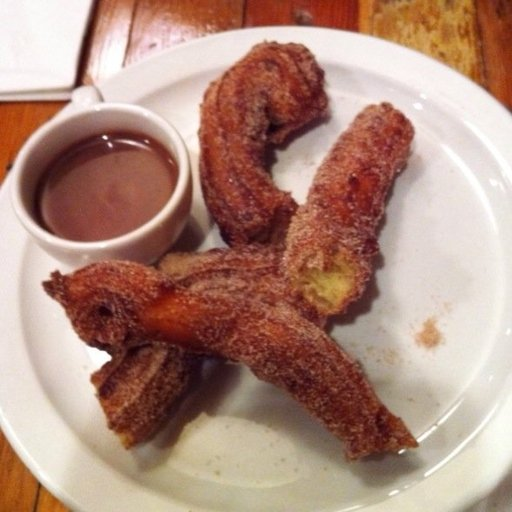

In [6]:
print(class_names[train_data[0][1]])
train_data[0][0]

### Creating subset of dataset
with chosen classes: baklava, churros, cheesecake

In [7]:
data_path = food101_dir / 'images'
target_classes = ['baklava', 'churros', 'cheesecake']

# 1 - all
amount_of_data_to_get = 1

In [ ]:
def get_subset(image_path=data_path,
               data_splits=['train', 'test'],
               target_classes=target_classes,
               amount=amount_of_data_to_get,
               seed=42):
    '''
    Create a random subset of Food-101 dataset images for the given data splits.

    Args:
        image_path (pathlib.Path): Base directory where images are stored.
        data_splits (list[str]): List of splits to sample from (e.g. ['train', 'test']).
        target_classes (list[str]): List of target classes to include (subset of Food-101 classes).
        amount (int): Number of images (per split) to include in the subset.
        seed (int): Random seed for reproducibility.

    Returns:
        dict[str, list[pathlib.Path]]: Dictionary mapping each data split
        ('train', 'test') to a list of image file paths.
    '''
    random.seed(seed)
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(f'[INFO] Creating image split for: {data_split}')
        label_path = food101_dir / 'meta' / f'{data_split}.txt'
        with open(label_path, 'r') as f:
            labels = [line.strip('\n') for line in f.readlines() if line.split('/')[0] in target_classes]
        
        # Get random subset of target classes images
        number_to_sample = round(amount * len(labels))
        print(f'[INFO] Getting random subset of {number_to_sample} images for {data_split}')
        sampled_images = random.sample(labels, k=number_to_sample)

        # Apply full path
        image_paths = [pathlib.Path(str(image_path / sample_image) + '.jpg') for sample_image in sampled_images]
        label_splits[data_split] = image_paths
        
    return label_splits

In [9]:
label_splits = get_subset()
label_splits['train'][:10]

[INFO] Creating image split for: train
[INFO] Getting random subset of 2250 images for train
[INFO] Creating image split for: test
[INFO] Getting random subset of 750 images for test


[WindowsPath('../data/raw/food-101/images/baklava/3140803.jpg'),
 WindowsPath('../data/raw/food-101/images/baklava/1451812.jpg'),
 WindowsPath('../data/raw/food-101/images/cheesecake/2856239.jpg'),
 WindowsPath('../data/raw/food-101/images/cheesecake/2262620.jpg'),
 WindowsPath('../data/raw/food-101/images/cheesecake/1845902.jpg'),
 WindowsPath('../data/raw/food-101/images/baklava/3678786.jpg'),
 WindowsPath('../data/raw/food-101/images/baklava/2929554.jpg'),
 WindowsPath('../data/raw/food-101/images/churros/944058.jpg'),
 WindowsPath('../data/raw/food-101/images/baklava/2581678.jpg'),
 WindowsPath('../data/raw/food-101/images/churros/1977745.jpg')]

### Moving training and testing images to dedicated directories

In [10]:
target_dir_name = f'{"_".join(target_classes)}'
print(f'Creating directory: {target_dir_name}')

target_dir = pathlib.Path(f'../data/processed/{target_dir_name}')
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: baklava_churros_cheesecake


In [14]:
# Copying images
for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        # print(f'[INFO] Copying {image_path} to {dest_dir}...')
        shutil.copy2(image_path, dest_dir)

In [15]:
def walk_through_dir(dir_path):
    '''
    Walks through the given directory and prints information about its contents.

    Args:
        dir_path (str): Path to the target directory.

    Prints:
        For each directory in the tree rooted at dir_path:
          - Number of subdirectories
          - Number of files
          - Directory path
    '''
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
        
walk_through_dir(target_dir)

There are 2 directories and 0 images in '..\data\processed\baklava_churros_cheesecake'.
There are 3 directories and 0 images in '..\data\processed\baklava_churros_cheesecake\test'.
There are 0 directories and 250 images in '..\data\processed\baklava_churros_cheesecake\test\baklava'.
There are 0 directories and 250 images in '..\data\processed\baklava_churros_cheesecake\test\cheesecake'.
There are 0 directories and 250 images in '..\data\processed\baklava_churros_cheesecake\test\churros'.
There are 3 directories and 0 images in '..\data\processed\baklava_churros_cheesecake\train'.
There are 0 directories and 750 images in '..\data\processed\baklava_churros_cheesecake\train\baklava'.
There are 0 directories and 750 images in '..\data\processed\baklava_churros_cheesecake\train\cheesecake'.
There are 0 directories and 750 images in '..\data\processed\baklava_churros_cheesecake\train\churros'.


### Zipping up images 

In [ ]:
shutil.make_archive(base_name=target_dir,
                    format='zip',
                    root_dir=target_dir)

### Removing not needed data

In [ ]:
#shutil.rmtree(raw_data)